# Análisis de datos con Pandas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Lista de archivos a utilizar
#https://www.footballdb.com/stats/penalties-player.html
#Num = Number of Penalties
#Yds = Yards Penalized
#FS = False Start
#HLD = Holding
#OFF = Offsides
#IC = Illegal Contact
#PI = Pass Interference
#RP = Roughing the Passer
#PF = Personal Foul
#UR = Unnecessary Roughness
#UC = Unsportsmanlike Conduct

archivos = ['penalties_2015.xls',
           'penalties_2016.xls',
           'penalties_2017.xls',
           'penalties_2018.xls',
           'penalties_2019.xls']
folder = '../datos/nfl/penalties/'

In [4]:
#Para almacenar los datos se utilizará un
#diccionario d[AÑO] = DATAFRAME

tablas = {}
years = ['2015', '2016', '2017', '2018', '2019']

for arch, year in zip(archivos, years):
    #Ruta del archivo
    ruta = folder + arch
    
    #Abre archivo
    dataframe = pd.read_excel(ruta)
    
    #Agrega columna Year al dataframe
    dataframe['Year'] = year
    
    #Agrega al diccionario
    tablas[year] = dataframe

In [13]:
#Concatenamos tablas
df_penal = pd.concat(tablas)
df_penal
#MULTI-INDEX
#df_penal.loc[ ('2015', 0) ]

Player Pos Team  Num  Yds  FS  HLD  OFF  IC  PI  \
2015 0     Brandon Browner (DB), NO  DB   NO   20  202   0    8    1   1   3   
     1      Ndamukong Suh (DT), Mia  DT  Mia   14   67   0    1    1   0   0   
     2    Dre Kirkpatrick (DB), Cin  DB  Cin   13  118   0    4    0   2   3   
     3      Greg Robinson (OT), Stl  OT  Stl   13  114   4    8    0   0   0   
     4       Jerry Hughes (DE), Buf  DE  Buf   13  109   0    0    1   0   0   
...                             ...  ..  ...  ...  ...  ..  ...  ...  ..  ..   
2019 45  Jadeveon Clowney (DE), Sea  DE  Sea    8   49   0    0    1   0   0   
     46    Jimmy Moreland (DB), Was  DB  Was    8   48   0    3    0   1   1   
     47   Michael Bennett (DE), Dal  DE  Dal    8   36   0    0    5   0   0   
     48    Richard Sherman (DB), SF  DB   SF    7  100   0    2    0   0   4   
     49    Darryl Roberts (DB), NYJ  DB  NYJ    7   89   0    2    0   0   3   

         RP  PF  UR  UC  Other  Year  
2015 0    0   0   3   0      4  2015  
     1    0   0   0   0     12  2015  
     2    0   0   0   0      4  2015  
     3    0   0   0   0      1  2015  
     4    1   0   3   0      8  2015  
...      ..  ..  ..  ..    ...   ...  
2019 45   1   0   0   0      6  2019  
     46   0   0   0   0      3  2019  
     47   0   0   0   0      3  2019  
     48   0   0   1   0      0  2019  
     49   0   0   0   0      2  2019  

[250 rows x 16 columns]

In [14]:
#Ya que la columna Player
#contiene información que también
#se encuentra en Pos y Team
#resulta conveniente limpiarla
def limpia_player(obs):
    '''
    obs es una observación
    de la columna Player
    '''
    
    #Hace split del string
    spl = obs.split(' ')
    nombre = spl[0]
    apellido = spl[1]
    
    return nombre + ' ' + apellido
    
df_penal['Player'] = df_penal['Player'].apply(limpia_player)
df_penal

Player Pos Team  Num  Yds  FS  HLD  OFF  IC  PI  RP  PF  \
2015 0    Brandon Browner  DB   NO   20  202   0    8    1   1   3   0   0   
     1      Ndamukong Suh  DT  Mia   14   67   0    1    1   0   0   0   0   
     2    Dre Kirkpatrick  DB  Cin   13  118   0    4    0   2   3   0   0   
     3      Greg Robinson  OT  Stl   13  114   4    8    0   0   0   0   0   
     4       Jerry Hughes  DE  Buf   13  109   0    0    1   0   0   1   0   
...                   ...  ..  ...  ...  ...  ..  ...  ...  ..  ..  ..  ..   
2019 45  Jadeveon Clowney  DE  Sea    8   49   0    0    1   0   0   1   0   
     46    Jimmy Moreland  DB  Was    8   48   0    3    0   1   1   0   0   
     47   Michael Bennett  DE  Dal    8   36   0    0    5   0   0   0   0   
     48   Richard Sherman  DB   SF    7  100   0    2    0   0   4   0   0   
     49    Darryl Roberts  DB  NYJ    7   89   0    2    0   0   3   0   0   

         UR  UC  Other  Year  
2015 0    3   0      4  2015  
     1    0   0     12  2015  
     2    0   0      4  2015  
     3    0   0      1  2015  
     4    3   0      8  2015  
...      ..  ..    ...   ...  
2019 45   0   0      6  2019  
     46   0   0      3  2019  
     47   0   0      3  2019  
     48   1   0      0  2019  
     49   0   0      2  2019  

[250 rows x 16 columns]

In [17]:
#Cambiar columna Team
#por el nombre del equipo
codigos = pd.read_csv('../datos/nfl/team_codes.csv')
def cambia_team(team):
    nombre = codigos[codigos['Code'] == team.upper()]['Name'].values
    if len(nombre) != 0:
        nombre = nombre[0].strip()
    else:
        nombre = team
    return nombre

df_penal['Team'] = df_penal['Team'].apply(cambia_team)
df_penal

Player Pos                 Team  Num  Yds  FS  HLD  OFF  \
2015 0    Brandon Browner  DB   New Orleans Saints   20  202   0    8    1   
     1      Ndamukong Suh  DT       Miami Dolphins   14   67   0    1    1   
     2    Dre Kirkpatrick  DB   Cincinnati Bengals   13  118   0    4    0   
     3      Greg Robinson  OT     Saint Louis Rams   13  114   4    8    0   
     4       Jerry Hughes  DE        Buffalo Bills   13  109   0    0    1   
...                   ...  ..                  ...  ...  ...  ..  ...  ...   
2019 45  Jadeveon Clowney  DE     Seattle Seahawks    8   49   0    0    1   
     46    Jimmy Moreland  DB  Washington Redskins    8   48   0    3    0   
     47   Michael Bennett  DE       Dallas Cowboys    8   36   0    0    5   
     48   Richard Sherman  DB  San Francisco 49ers    7  100   0    2    0   
     49    Darryl Roberts  DB        New York Jets    7   89   0    2    0   

         IC  PI  RP  PF  UR  UC  Other  Year  
2015 0    1   3   0   0   3   0      4  2015  
     1    0   0   0   0   0   0     12  2015  
     2    2   3   0   0   0   0      4  2015  
     3    0   0   0   0   0   0      1  2015  
     4    0   0   1   0   3   0      8  2015  
...      ..  ..  ..  ..  ..  ..    ...   ...  
2019 45   0   0   1   0   0   0      6  2019  
     46   1   1   0   0   0   0      3  2019  
     47   0   0   0   0   0   0      3  2019  
     48   0   4   0   0   1   0      0  2019  
     49   0   3   0   0   0   0      2  2019  

[250 rows x 16 columns]

In [30]:
#Que jugador ha cometido
#el mayor número de faltas
#Se agrupan datos por la columna Player
gr_jugador = df_penal.groupby('Player')
df_jugador = gr_jugador.sum()['Num']

#Para un objeto Series
#No es necesario especificar
#La columna por la que se ordenan
#sus valores
df_jugador = df_jugador.sort_values(ascending = False)
df_jugador

Player
Greg Robinson          41
Taylor Lewan           38
Germain Ifedi          38
Donovan Smith          34
Jadeveon Clowney       34
                       ..
Wes Schweitzer          7
Johnny Holton           7
Prince Amukamara        7
Morris Claiborne        7
Ahkello Witherspoon     7
Name: Num, Length: 181, dtype: int64

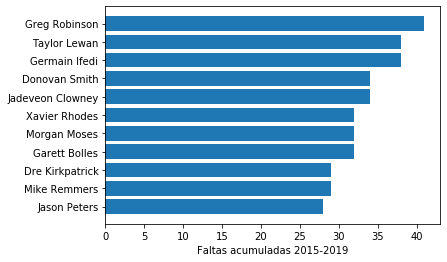

In [33]:
plt.barh(y = df_jugador.index[10::-1], width =  df_jugador[10::-1])
plt.xlabel('Faltas acumuladas 2015-2019')
plt.show()

In [35]:
#Faltas por jugador y equipo
gr_jug_eq = df_penal.groupby(['Player', 'Team'])
ser_jug_eq = gr_jug_eq.sum()['Num'].sort_values(ascending = False)
ser_jug_eq

Player           Team                
Germain Ifedi    Seattle Seahawks        38
Taylor Lewan     Tennessee Titans        38
Donovan Smith    Tampa Bay Buccaneers    34
Morgan Moses     Washington Redskins     32
Garett Bolles    Denver Broncos          32
                                         ..
T.J. Lang        Detroit Lions            7
Russell Wilson   Seattle Seahawks         7
Stephon Gilmore  New England Patriots     7
Eli Apple        New York Giants          7
Johnny Holton    Oakland Raiders          7
Name: Num, Length: 198, dtype: int64

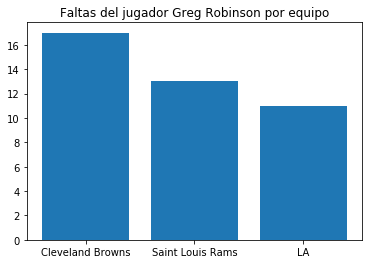

In [41]:
#Faltas de un jugador en particular
#por equipo
jug = 'Greg Robinson'
plt.bar(x = ser_jug_eq[jug].index, height = ser_jug_eq[jug])
plt.title(f'Faltas del jugador {jug} por equipo')
plt.show()

In [42]:
#Equipos con más faltas
gr_equipo = df_penal.groupby('Team')
ser_equipo = gr_equipo.sum()['Num'].sort_values(ascending = False)
ser_equipo

Team
Tampa Bay Buccaneers    127
Seattle Seahawks        123
Washington Redskins     122
Houston Texans          102
Denver Broncos          100
Oakland Raiders         100
Miami Dolphins           98
Jacksonville Jaguars     96
Philadelphia Eagles      88
New Orleans Saints       84
Kansas City Chiefs       83
Cleveland Browns         78
Dallas Cowboys           76
Chicago Bears            73
Atlanta Falcons          70
Cincinnati Bengals       70
San Francisco 49ers      70
Pittsburgh Steelers      58
Buffalo Bills            57
Minnesota Vikings        55
Green Bay Packers        55
New York Giants          54
Carolina Panthers        53
New England Patriots     49
New York Jets            48
Tennessee Titans         46
Arizona Cardinals        42
Indianapolis Colts       41
LA                       40
LAC                      39
Baltimore Ravens         34
Detroit Lions            33
San Diego Chargers       20
Saint Louis Rams         13
Name: Num, dtype: int64

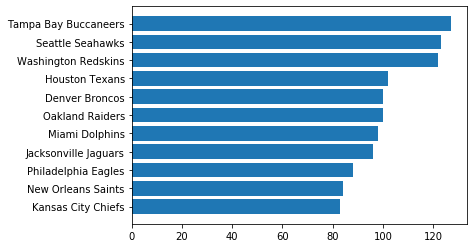

In [43]:
plt.barh(y = ser_equipo.index[10::-1], width = ser_equipo[10::-1])
plt.show()

In [45]:
#Equipo con el mayor número de faltas
#dentro de ciertas categorías
#PF = Personal Foul
#UR = Unnecessary Roughness
#UC = Unsportsmanlike Conduct
categorias = ['PF', 'UR', 'UC']
str_categ = '+'.join(categorias)
gr_equipo = df_penal.groupby('Team')
df_eq_categ = gr_equipo.sum()[categorias]
df_eq_categ[str_categ] = df_eq_categ.sum(axis = 1)
df_eq_categ.sort_values(by = str_categ, ascending = False, inplace = True)
df_eq_categ

#Para validar
#df_penal.loc[df_penal['Team'] == 'Was', categorias].sum(axis = 0)

,PF,UR,UC,PF+UR+UC
Team,,,,
Denver Broncos,0,10,0,10
Buffalo Bills,0,9,0,9
Tampa Bay Buccaneers,0,8,0,8
Seattle Seahawks,0,7,0,7
Pittsburgh Steelers,0,5,0,5
Washington Redskins,0,4,0,4
Kansas City Chiefs,0,4,0,4
Jacksonville Jaguars,0,4,0,4
New York Jets,0,4,0,4


In [46]:
#Jugador con el mayor número de faltas
#dentro de ciertas categorías
#PF = Personal Foul
#UR = Unnecessary Roughness
#UC = Unsportsmanlike Conduct
categorias = ['PF', 'UR', 'UC']
str_categ = '+'.join(categorias)
df_jug_categ = gr_jugador.sum()[categorias]
df_jug_categ[str_categ] = df_jug_categ.sum(axis = 1)
df_jug_categ.sort_values(by = str_categ, ascending = False, inplace = True)
df_jug_categ

,PF,UR,UC,PF+UR+UC
Player,,,,
Jerry Hughes,0,5,0,5
Ryan Jensen,0,4,0,4
Darryl Skrine,0,4,0,4
Derek Barnett,0,3,0,3
Brandon Browner,0,3,0,3
...,...,...,...,...
Isaiah Oliver,0,0,0,0
J.J. Watt,0,0,0,0
Ja'Wuan James,0,0,0,0


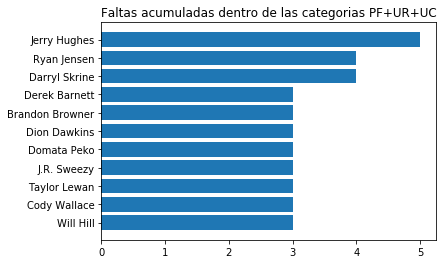

In [47]:
plt.barh(y = df_jug_categ.index[10::-1],
         #loc no funciona con índices enteros
         #es por eso que se complica la expresión
         width = df_jug_categ.loc[df_jug_categ.index[10::-1], '+'.join(categorias)])
plt.title(f'Faltas acumuladas dentro de las categorias {"+".join(categorias)}')
plt.show()

In [48]:
#Años con más amonestaciones dentro
#de cierta categoría
#PF = Personal Foul
#UR = Unnecessary Roughness
#UC = Unsportsmanlike Conduct
gr_year = df_penal.groupby('Year')
categorias = ['PF', 'UR', 'UC']
str_categ = '+'.join(categorias)
df_year_categ = gr_year.sum()[categorias]
df_year_categ[str_categ] = df_year_categ.sum(axis = 1)
df_year_categ.sort_values(by = str_categ, ascending = False, inplace = True)
df_year_categ

,PF,UR,UC,PF+UR+UC
Year,,,,
2015,0,29,0,29
2016,0,25,0,25
2018,0,17,0,17
2019,0,15,0,15
2017,0,11,0,11
